### **Import Libraries and modules**



*   Keras is a high-level neural networks API, written in Python(supports Python 2.7-3.6)
*  pip install command installs the packages
*   The below code installs keras and imports the library into the module


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Add

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

*  Loading dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 *images*




In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


*   Printing the number of data in X_train, dimension of each image and plotting the first image in X_train




(60000, 28, 28)


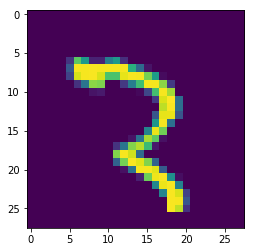

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[500])

### Reshaping the dataset






 

*   Converts each data in X_train(28 x 28) & X_test into dimension 28x28x1.
*   This is done because the model we are using below - Convolution2D expects the
data to be 3 dimensional and mnist.load_data() provides data as (number_of_samples, 28, 28)



In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

*   Converts the dataset X_train and X_test into float (32-bits)
*   This is done as 32-bit precision is commonly used when training a neural network.
*  Also, as we are dividing every value in the training set by 255(maximum value of a byte) in the next step. 
*   If the datatype of training set  is not float, after division by 255 the values would be just 0 or 1
*  Dividing number with 255 is done so that the input features are scaled between 0.0 and 1.0. (normalization)









In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

*   displays the first 10 output values in the output training dataset

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* Converts each value in the output training and testing dataset into vector of dimension 1xnumber_of_classes
* The values in the vector will be 0. or 1. 
* Only one of the values in each vector will be 1, indicating the class to which the input data belongs to. Eg the first value in the y_train is 5, this will be converted into  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]. 
* The 6th value in the vector will be 1 indicating class 5.
* The first value in the vector represents class 0, second value represents class 1 and so on.

* Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

* displays the first 10 output values in the output training dataset after conversion to vectors


In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Training DNN Model

* Model

In [189]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))

model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update

In [190]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_387 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_388 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_389 (Conv2D)          (None, 22, 22, 24)        3480      
_________________________________________________________________
conv2d_390 (Conv2D)          (None, 22, 22, 8)         200       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 11, 11, 8)         0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_391 (Conv2D)          (None, 9, 9, 8)           584       
__________

* Compiles the convolution model. 
* Compile method takes 3 parameters - loss, optimizer, metrics
* loss - lower the score, better the performance. value: categorical_crossentropy (commonly used)
* optimizer - controls the learning rate (determines how fast the optimal weights for the model are calculated)
* metrics - displays the accuracy metrics. indicates the accuracy of the trained model 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [195]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1)

Epoch 1/30
 1216/60000 [..............................] - ETA: 8s - loss: 0.0290 - acc: 0.9877

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 131us/step - loss: 0.0300 - acc: 0.9902
Epoch 2/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.0280 - acc: 0.9910
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.0266 - acc: 0.9914
Epoch 4/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0267 - acc: 0.9911
Epoch 5/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.0257 - acc: 0.9916
Epoch 6/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0253 - acc: 0.9916
Epoch 7/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0237 - acc: 0.9919
Epoch 8/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0237 - acc: 0.9922
Epoch 9/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0234 - acc: 0.9921
Epoch 10/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0242 - acc: 0.9919


* Evaluates the trained model. 
* Returns the loss value & metrics values for the model in test mode
* Returns the accuracy of the model in this *

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [197]:
print(score)

[0.031124401932613364, 0.9913]


* The trained model predicts the output for all the input dataset in X_test


In [0]:
y_pred = model.predict(X_test)

In [217]:
print(y_pred[:9])
print(y_test[:9])

[[9.21644792e-12 1.64206654e-07 4.12715326e-06 5.18118313e-08
  3.60710914e-07 1.19364199e-10 1.91028942e-17 9.99993205e-01
  6.93901603e-10 2.16547733e-06]
 [5.40889467e-08 1.69114145e-07 9.99999523e-01 1.46104018e-10
  2.49118365e-10 2.76379197e-10 1.86010666e-07 5.70938193e-11
  3.31840759e-08 5.77983706e-14]
 [4.74322187e-12 9.99998212e-01 1.44369583e-08 4.05388431e-11
  4.17996176e-07 2.54959822e-08 1.08775011e-09 1.37989718e-06
  1.02745625e-08 4.62864662e-08]
 [9.97561336e-01 5.60426705e-10 2.58570680e-07 3.06075854e-09
  3.73771094e-08 2.24538826e-06 2.43556057e-03 3.25126370e-09
  2.37649175e-07 3.14335409e-07]
 [4.23311939e-13 1.81482950e-15 7.86186727e-10 1.84236959e-10
  9.99983191e-01 2.29293494e-11 1.76278692e-09 2.24722534e-08
  2.90249957e-09 1.67625349e-05]
 [2.40194128e-12 9.99997854e-01 3.53185499e-08 3.65423525e-11
  4.20740747e-07 3.70860032e-09 5.64602150e-11 1.75329569e-06
  6.25872021e-09 4.89122982e-08]
 [5.66966266e-12 3.16245767e-08 2.68834829e-05 7.12565873e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [79]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

NameError: ignored